In [1]:
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

### Loading the dataset

In [2]:
import pandas as pd
df = pd.read_csv("New_Delhi_reviews.csv")
df.head(10)

C:\Users\91998\AppData\Local\Temp\ipykernel_17444\2242416974.py:2: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("New_Delhi_reviews.csv")


,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,1,2,Tres,1,Negative,review_775293863,Disappointed - chef with no mask & greasy burg...,Visited Tres last week with my dad for lunch. ...,Visited Tres last week with my dad for lunch. ...,"October 23, 2020",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,2,3,Tres,5,Positive,review_747900259,"Nice vibe, excellent food","The restaurant design is classy, the service i...","The restaurant design is classy, the service i...","February 27, 2020",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,3,4,Tres,4,Positive,review_743264650,Good food and drink,I went to Tres while visiting my family in Del...,I went to Tres while visiting my family in Del...,"February 5, 2020",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
3,4,5,Tres,5,Positive,review_736716517,Excellent food and service.,"We went for lunch, for a Friday afternoon, it ...","We went for lunch, for a Friday afternoon, it ...","January 3, 2020",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
4,5,6,Tres,4,Positive,review_734213992,Stand Alone Stands Alone,Tres is my most often visited and favourite st...,Tres is my most often visited and favourite st...,"December 22, 2019",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,UID_4
5,6,7,Grappa_Shangri_La_s_Eros_Hotel,5,Positive,review_770009182,Missing my grappa bar guys,Missing my grappa bar guys only Vimal is there...,Missing my grappa bar guys only Vimal is there...,"September 12, 2020",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,UID_5
6,7,8,Tres,4,Positive,review_725644820,Had a good experience,"I have been there, ambience was very good...th...","I have been there, ambience was very good...th...","November 11, 2019",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,UID_6
7,8,9,Tres,5,Positive,review_718582880,Great food,We came as part of a large group from work. We...,We came as part of a large group from work. We...,"October 15, 2019",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,UID_7
8,9,10,Tres,4,Positive,review_709479876,"Charming, Relaxed, Even Intimate Setting for F...",Tres is perhaps best described as an intimate ...,Tres is perhaps best described as an intimate ...,"September 13, 2019",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,UID_8
9,10,11,Tres,5,Positive,review_693745318,"Trendy, innovative, distinct food, plus great ...","I have to admit, I wanted to try many things f...","I have to admit, I wanted to try many things f...","July 29, 2019",New_Delhi_National_Capital_Territory_of_Delhi,https://www.tripadvisor.com/Restaurant_Review-...,UID_9


### EDA

In [3]:
print(df.shape)

(198772, 13)


In [4]:
df.columns

Index(['Unnamed: 0', 'parse_count', 'restaurant_name', 'rating_review',
       'sample', 'review_id', 'title_review', 'review_preview', 'review_full',
       'date', 'city', 'url_restaurant', 'author_id'],
      dtype='object')

**Removing unwanted columns,**

In [5]:
df1 = df.drop(columns=['Unnamed: 0', 'parse_count', 'city', 'date', 'url_restaurant','author_id','review_id'])
df1.head()

,restaurant_name,rating_review,sample,title_review,review_preview,review_full
0,Tres,1,Negative,Disappointed - chef with no mask & greasy burg...,Visited Tres last week with my dad for lunch. ...,Visited Tres last week with my dad for lunch. ...
1,Tres,5,Positive,"Nice vibe, excellent food","The restaurant design is classy, the service i...","The restaurant design is classy, the service i..."
2,Tres,4,Positive,Good food and drink,I went to Tres while visiting my family in Del...,I went to Tres while visiting my family in Del...
3,Tres,5,Positive,Excellent food and service.,"We went for lunch, for a Friday afternoon, it ...","We went for lunch, for a Friday afternoon, it ..."
4,Tres,4,Positive,Stand Alone Stands Alone,Tres is my most often visited and favourite st...,Tres is my most often visited and favourite st...


In [6]:
print(df1.shape)

(198772, 6)


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198772 entries, 0 to 198771
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   restaurant_name  198772 non-null  object
 1   rating_review    198772 non-null  object
 2   sample           198772 non-null  object
 3   title_review     198769 non-null  object
 4   review_preview   198770 non-null  object
 5   review_full      147598 non-null  object
dtypes: object(6)
memory usage: 9.1+ MB


**Checking and handling null values,**

In [8]:
df1.isna().sum()

restaurant_name        0
rating_review          0
sample                 0
title_review           3
review_preview         2
review_full        51174
dtype: int64

In [9]:
df1.dropna(inplace=True)

print(df1.isnull().sum())

restaurant_name    0
rating_review      0
sample             0
title_review       0
review_preview     0
review_full        0
dtype: int64


**Inspecting 'rating_review' column,**

In [10]:
unique_values = df1['rating_review'].value_counts()
print(unique_values)

rating_review
5    38715
5    33686
4    29135
4    21117
3     9136
3     6800
2     2626
1     2452
1     2004
2     1926
Name: count, dtype: int64


In [12]:
# Converting the column to integer type
df1['rating_review'] = df1['rating_review'].astype(int)

In [13]:
# Count of each value in the column
rating_review_counts = df1['rating_review'].value_counts()
print(rating_review_counts)

rating_review
5    72401
4    50252
3    15936
2     4552
1     4456
Name: count, dtype: int64


In [14]:
# Total number of reviews and distribution of ratings sorted according to index
total_reviews = len(df1)

rating_counts = df1['rating_review'].value_counts().sort_index()

print("Total number of reviews:", total_reviews)
print("\nDistribution of ratings:")
print(rating_counts)

Total number of reviews: 147597

Distribution of ratings:
rating_review
1     4456
2     4552
3    15936
4    50252
5    72401
Name: count, dtype: int64


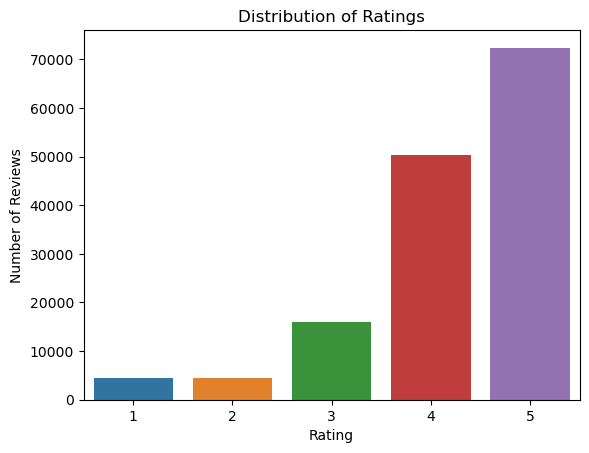

In [15]:
# Distribution of ratings plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

**From the graph above, there is clearly class imbalance. So, merging ratings - 1,2,3 as 'poor', 4 as 'good' and 5 as 'excellent'.**

In [16]:
# 1,2,3 as 'poor', 4 as 'good' and 5 as 'excellent'

rating_mapping = {1: 'Poor', 2: 'Poor', 3: 'Poor', 4: 'Good', 5: 'Excellent'}

df1['rating_category'] = df1['rating_review'].replace(rating_mapping)

category_counts = df1['rating_category'].value_counts()

print(category_counts)

rating_category
Excellent    72401
Good         50252
Poor         24944
Name: count, dtype: int64


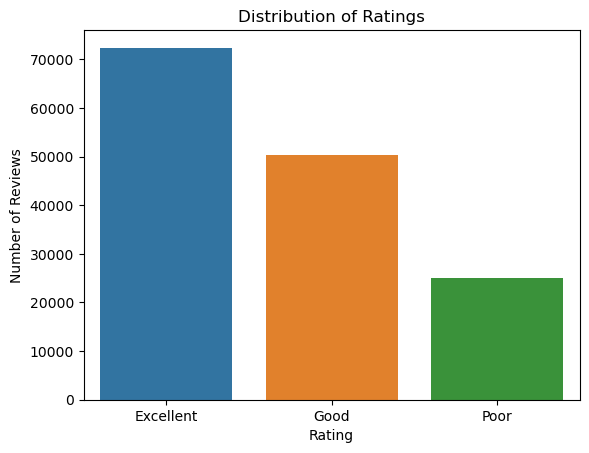

In [17]:
# Distribution of ratings plot after merges
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

**Word Count**

In [18]:
df1['words'] = [x.split() for x in df1['review_full']]
df1['word_count'] = [len(x) for x in df1['words']]
df1.head()

,restaurant_name,rating_review,sample,title_review,review_preview,review_full,rating_category,words,word_count
0,Tres,1,Negative,Disappointed - chef with no mask & greasy burg...,Visited Tres last week with my dad for lunch. ...,Visited Tres last week with my dad for lunch. ...,Poor,"[Visited, Tres, last, week, with, my, dad, for...",312
1,Tres,5,Positive,"Nice vibe, excellent food","The restaurant design is classy, the service i...","The restaurant design is classy, the service i...",Excellent,"[The, restaurant, design, is, classy,, the, se...",123
2,Tres,4,Positive,Good food and drink,I went to Tres while visiting my family in Del...,I went to Tres while visiting my family in Del...,Good,"[I, went, to, Tres, while, visiting, my, famil...",21
3,Tres,5,Positive,Excellent food and service.,"We went for lunch, for a Friday afternoon, it ...","We went for lunch, for a Friday afternoon, it ...",Excellent,"[We, went, for, lunch,, for, a, Friday, aftern...",91
4,Tres,4,Positive,Stand Alone Stands Alone,Tres is my most often visited and favourite st...,Tres is my most often visited and favourite st...,Good,"[Tres, is, my, most, often, visited, and, favo...",229


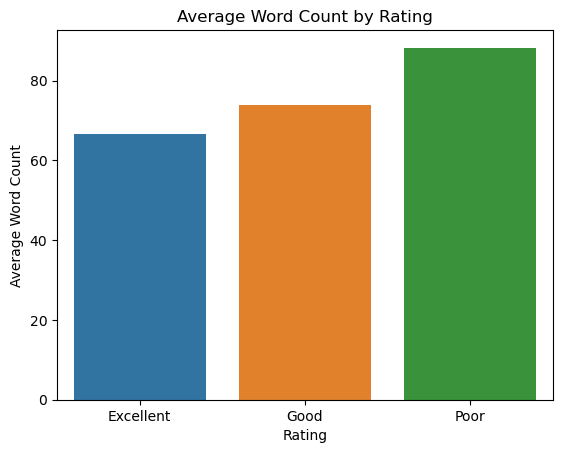

In [19]:
# Average word count by rating plot
word_rating_counts = df1.groupby('rating_category')['word_count'].mean()
word_rating_counts

sns.barplot(x=word_rating_counts.index, y=word_rating_counts.values)
plt.title('Average Word Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Word Count')
plt.show()

**The above bar plot indicates the word count of each rating category. It shows that poor reviews have more words.**

### Data Pre-processing

In [20]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    
    # Converting to lowercase
    text = text.lower()
    
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    
    # Removing URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Removing emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Removing punctuation and non-ascii characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Removing extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatized)

def clean_and_lemmatize(text):
    cleaned_text = clean_text(text)
    lemmatized_text = lemmatize_text(cleaned_text)
    return lemmatized_text

In [21]:
df1['cleaned_review'] = df1['review_full'].apply(clean_and_lemmatize)
df1['cleaned_title'] = df1['title_review'].apply(clean_and_lemmatize)

In [22]:
df1.head()

,restaurant_name,rating_review,sample,title_review,review_preview,review_full,rating_category,words,word_count,cleaned_review,cleaned_title
0,Tres,1,Negative,Disappointed - chef with no mask & greasy burg...,Visited Tres last week with my dad for lunch. ...,Visited Tres last week with my dad for lunch. ...,Poor,"[Visited, Tres, last, week, with, my, dad, for...",312,visited tres last week dad lunch always enjoye...,disappointed chef mask greasy burger
1,Tres,5,Positive,"Nice vibe, excellent food","The restaurant design is classy, the service i...","The restaurant design is classy, the service i...",Excellent,"[The, restaurant, design, is, classy,, the, se...",123,restaurant design classy service good book ahe...,nice vibe excellent food
2,Tres,4,Positive,Good food and drink,I went to Tres while visiting my family in Del...,I went to Tres while visiting my family in Del...,Good,"[I, went, to, Tres, while, visiting, my, famil...",21,went tres visiting family delhi food good reco...,good food drink
3,Tres,5,Positive,Excellent food and service.,"We went for lunch, for a Friday afternoon, it ...","We went for lunch, for a Friday afternoon, it ...",Excellent,"[We, went, for, lunch,, for, a, Friday, aftern...",91,went lunch friday afternoon surprisingly le po...,excellent food service
4,Tres,4,Positive,Stand Alone Stands Alone,Tres is my most often visited and favourite st...,Tres is my most often visited and favourite st...,Good,"[Tres, is, my, most, often, visited, and, favo...",229,tres often visited favourite stand alone resta...,stand alone stand alone


### Tokenization

In [23]:
import nltk
from nltk.tokenize import word_tokenize

df1['tokenized_review'] = df1['cleaned_review'].apply(word_tokenize)

df1.head()

,restaurant_name,rating_review,sample,title_review,review_preview,review_full,rating_category,words,word_count,cleaned_review,cleaned_title,tokenized_review
0,Tres,1,Negative,Disappointed - chef with no mask & greasy burg...,Visited Tres last week with my dad for lunch. ...,Visited Tres last week with my dad for lunch. ...,Poor,"[Visited, Tres, last, week, with, my, dad, for...",312,visited tres last week dad lunch always enjoye...,disappointed chef mask greasy burger,"[visited, tres, last, week, dad, lunch, always..."
1,Tres,5,Positive,"Nice vibe, excellent food","The restaurant design is classy, the service i...","The restaurant design is classy, the service i...",Excellent,"[The, restaurant, design, is, classy,, the, se...",123,restaurant design classy service good book ahe...,nice vibe excellent food,"[restaurant, design, classy, service, good, bo..."
2,Tres,4,Positive,Good food and drink,I went to Tres while visiting my family in Del...,I went to Tres while visiting my family in Del...,Good,"[I, went, to, Tres, while, visiting, my, famil...",21,went tres visiting family delhi food good reco...,good food drink,"[went, tres, visiting, family, delhi, food, go..."
3,Tres,5,Positive,Excellent food and service.,"We went for lunch, for a Friday afternoon, it ...","We went for lunch, for a Friday afternoon, it ...",Excellent,"[We, went, for, lunch,, for, a, Friday, aftern...",91,went lunch friday afternoon surprisingly le po...,excellent food service,"[went, lunch, friday, afternoon, surprisingly,..."
4,Tres,4,Positive,Stand Alone Stands Alone,Tres is my most often visited and favourite st...,Tres is my most often visited and favourite st...,Good,"[Tres, is, my, most, often, visited, and, favo...",229,tres often visited favourite stand alone resta...,stand alone stand alone,"[tres, often, visited, favourite, stand, alone..."


**Word Frequencies**

[('food', 137781), ('place', 95281), ('good', 93971), ('restaurant', 57515), ('service', 57112), ('one', 43898), ('great', 43402), ('chicken', 35580), ('time', 34510), ('staff', 30749), ('also', 30276), ('dish', 29938), ('taste', 29113), ('delhi', 28527), ('nice', 28411), ('best', 28322), ('indian', 28214), ('visit', 27209), ('really', 26610), ('well', 25723)]


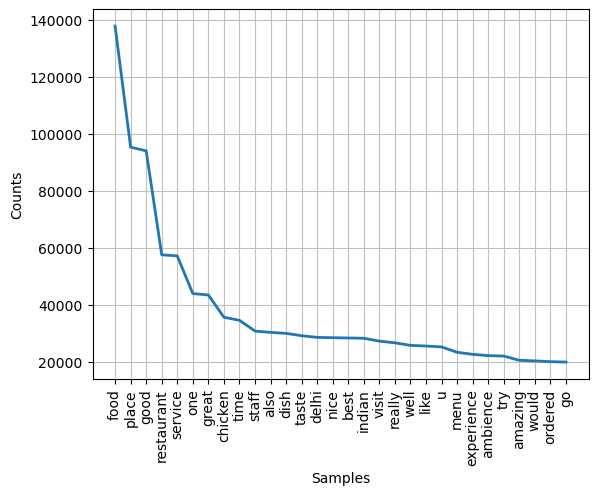

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
from nltk import FreqDist

all_words = [word for tokens in df1['tokenized_review'] for word in tokens]
freq_dist = FreqDist(all_words)
print(freq_dist.most_common(20)) 

freq_dist.plot(30, cumulative=False)

**Above graph is the frequency distribution of the most used words in the reviews.**

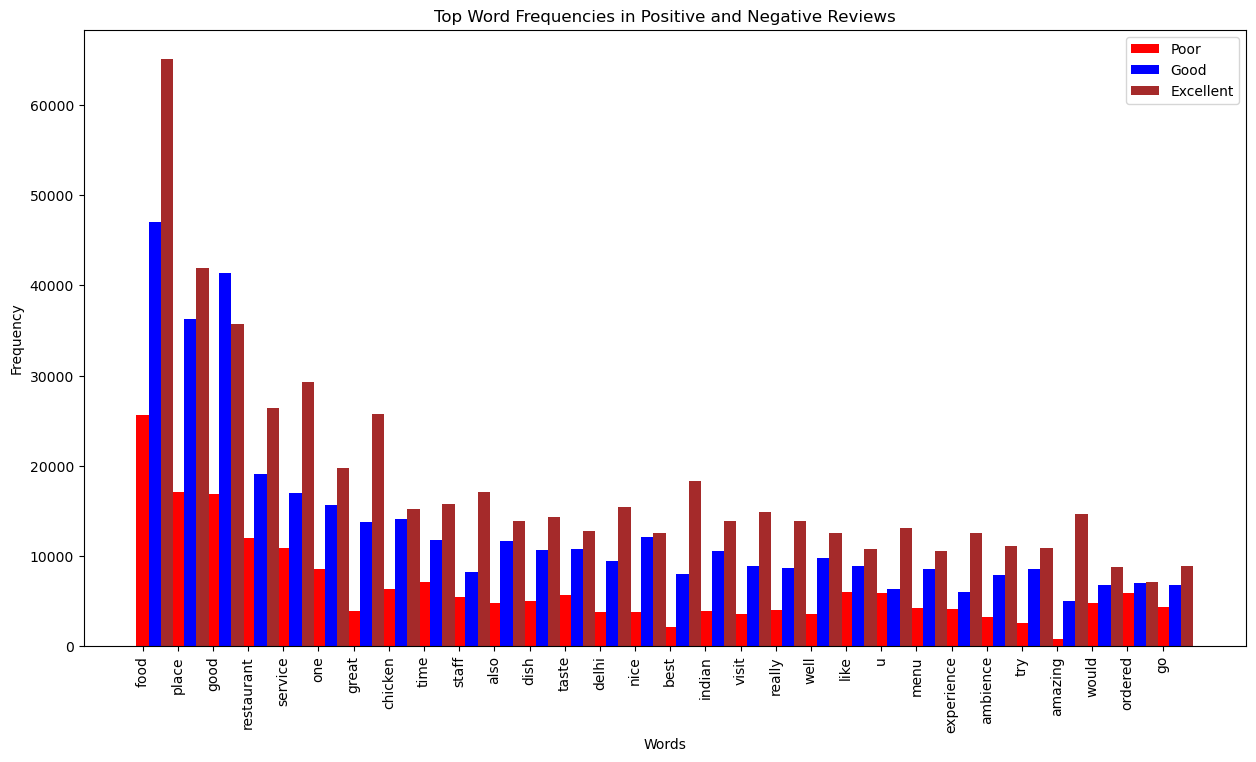

In [25]:
# Top word frequencies across all review categories

import numpy as np

poor_reviews = df1[df1['rating_category'] == 'Poor']['tokenized_review']
good_reviews = df1[df1['rating_category'] == 'Good']['tokenized_review']
excellent_reviews = df1[df1['rating_category'] == 'Excellent']['tokenized_review']

poor_words = [word for tokens in poor_reviews for word in tokens]
good_words = [word for tokens in good_reviews for word in tokens]
excellent_words = [word for tokens in excellent_reviews for word in tokens]

common_words = set(poor_words) | set(good_words) | set(excellent_words)  

poor_freq_dist = FreqDist(poor_words)
good_freq_dist = FreqDist(good_words)
excellent_freq_dist = FreqDist(excellent_words)

poor_freq_dict = dict(poor_freq_dist)
good_freq_dict = dict(good_freq_dist)
excellent_freq_dict = dict(excellent_freq_dist)

poor_freq = [poor_freq_dict.get(word, 0) for word in common_words]
good_freq = [good_freq_dict.get(word, 0) for word in common_words]
excellent_freq = [excellent_freq_dict.get(word, 0) for word in common_words]

sorted_words = sorted(common_words, key=lambda x: poor_freq_dict.get(x, 0) + good_freq_dict.get(x, 0)+ excellent_freq_dict.get(x, 0), reverse=True)

N = 30
top_words = sorted_words[:N]
top_poor_freq = [poor_freq_dict.get(word, 0) for word in top_words]
top_good_freq = [good_freq_dict.get(word, 0) for word in top_words]
top_excellent_freq = [excellent_freq_dict.get(word, 0) for word in top_words]

ind = np.arange(N)  
width = 0.35       

fig, ax = plt.subplots(figsize=(15, 8))
poor_bars = ax.bar(ind, top_poor_freq, width, label='Poor', color='red')
good_bars = ax.bar(ind + width, top_good_freq, width, label='Good', color='blue')
excellent_bars = ax.bar(ind + 2 * width, top_excellent_freq, width, label='Excellent', color='brown')

ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top Word Frequencies in Positive and Negative Reviews')
ax.set_xticks(ind)
ax.set_xticklabels(top_words, rotation=90)
ax.legend()

plt.show()

#### Word Clouds

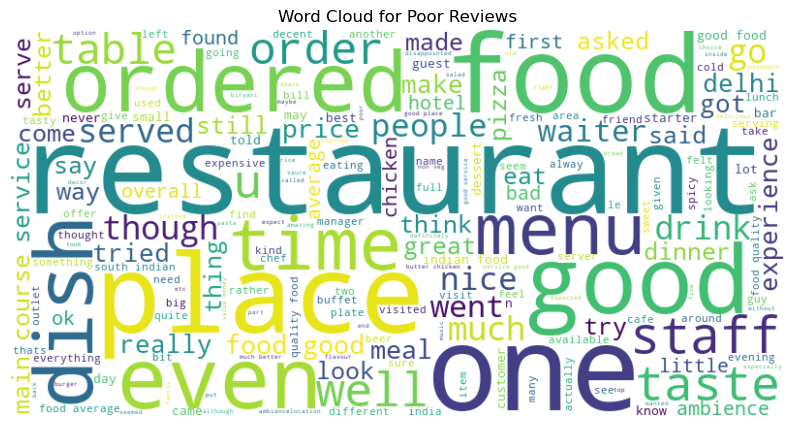

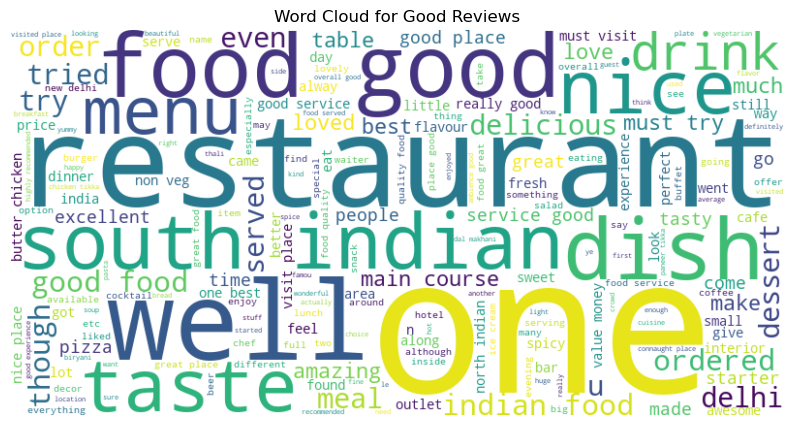

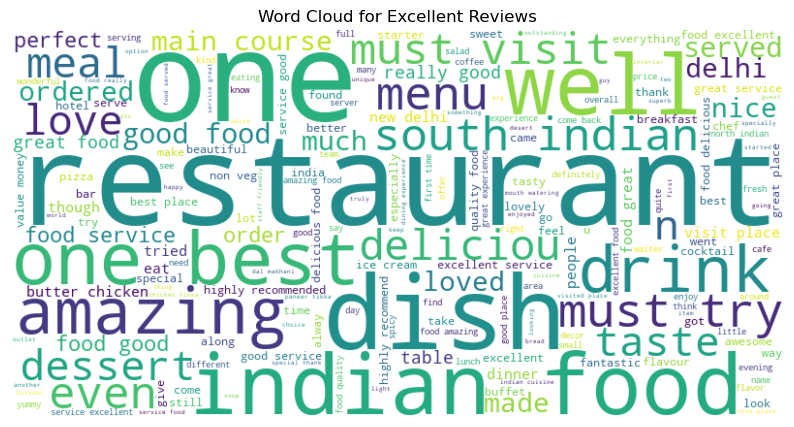

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

poor_reviews = df1[df1['rating_category'] == 'Poor']
poor_text = ' '.join(poor_reviews['cleaned_review'])
generate_word_cloud(poor_text, 'Word Cloud for Poor Reviews')

good_reviews = df1[df1['rating_category'] == 'Good']
good_text = ' '.join(good_reviews['cleaned_review'])
generate_word_cloud(good_text, 'Word Cloud for Good Reviews')

excellent_reviews = df1[df1['rating_category'] == 'Excellent']
excellent_text = ' '.join(excellent_reviews['cleaned_review'])
generate_word_cloud(excellent_text, 'Word Cloud for Excellent Reviews')

#### Bigrams & Trigrams 

In [27]:
from nltk.util import bigrams, trigrams
from nltk.probability import FreqDist
from tabulate import tabulate

good_bigrams_list = list(bigrams(good_text.split()))
poor_bigrams_list = list(bigrams(poor_text.split()))
excellent_bigrams_list = list(bigrams(excellent_text.split()))
good_trigrams_list = list(trigrams(good_text.split()))
poor_trigrams_list = list(trigrams(poor_text.split()))
excellent_trigrams_list = list(trigrams(excellent_text.split()))

poor_bigram_freq_dist = FreqDist(poor_bigrams_list)
good_bigram_freq_dist = FreqDist(good_bigrams_list)
excellent_bigram_freq_dist = FreqDist(excellent_bigrams_list)
good_trigram_freq_dist = FreqDist(good_trigrams_list)
poor_trigram_freq_dist = FreqDist(poor_trigrams_list)
excellent_trigram_freq_dist = FreqDist(excellent_trigrams_list)

print("Top 10 Most Common Bigrams for Poor reviews:")
print(tabulate(poor_bigram_freq_dist.most_common(10), headers=["Bigram", "Frequency"]))
print("\nTop 10 Most Common Trigrams for Poor reviews:")
print(tabulate(poor_trigram_freq_dist.most_common(10), headers=["Trigram", "Frequency"]))

print("Top 10 Most Common Bigrams for Good reviews:")
print(tabulate(good_bigram_freq_dist.most_common(10), headers=["Bigram", "Frequency"]))
print("\nTop 10 Most Common Trigrams for Good reviews:")
print(tabulate(good_trigram_freq_dist.most_common(10), headers=["Trigram", "Frequency"]))

print("Top 10 Most Common Bigrams for Excellent reviews:")
print(tabulate(excellent_bigram_freq_dist.most_common(10), headers=["Bigram", "Frequency"]))
print("\nTop 10 Most Common Trigrams for Excellent reviews:")
print(tabulate(excellent_trigram_freq_dist.most_common(10), headers=["Trigram", "Frequency"]))

Top 10 Most Common Bigrams for Poor reviews:
Bigram                   Frequency
---------------------  -----------
('food', 'good')              1686
('main', 'course')            1273
('good', 'food')              1024
('indian', 'food')             978
('food', 'average')            960
('south', 'indian')            957
('food', 'quality')            902
('quality', 'food')            810
('service', 'good')            675
('butter', 'chicken')          670

Top 10 Most Common Trigrams for Poor reviews:
Trigram                              Frequency
---------------------------------  -----------
('south', 'indian', 'food')                334
('north', 'indian', 'food')                133
('food', 'good', 'service')                132
('veg', 'non', 'veg')                      128
('south', 'indian', 'restaurant')          100
('heard', 'lot', 'place')                   93
('nothing', 'write', 'home')                91
('write', 'home', 'about')                  90
('starter', 'main'

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X = df1['cleaned_review']
y = df1['rating_category']

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size= 0.8, random_state= 42)

### Feature Extraction 

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1, 2), max_df=0.95, min_df=2)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

feature_names = tfidf_vectorizer.get_feature_names_out()

print("Shape of TF-IDF features (training set):", X_train_tfidf.shape)
print("Shape of TF-IDF features (test set):", X_test_tfidf.shape)

# Printing the top 10 words with the highest TF-IDF weights for training set
for i in range(min(10, X_train_tfidf.shape[0])):
    print(f"Training Sample {i+1}:")
    top_indices = X_train_tfidf[i].toarray().argsort()[0][::-1][:10]
    top_words = [feature_names[idx] for idx in top_indices]
    top_weights = [X_train_tfidf[i, idx] for idx in top_indices]
    print("Top words:", top_words)
    print("TF-IDF weights:", top_weights)
    print()

# Printing the top 10 words with the highest TF-IDF weights for test set
for i in range(min(10,X_test_tfidf.shape[0])):
    print(f"Test Sample {i+1}:")
    top_indices = X_test_tfidf[i].toarray().argsort()[0][::-1][:10]
    top_words = [feature_names[idx] for idx in top_indices]
    top_weights = [X_test_tfidf[i, idx] for idx in top_indices]
    print("Top words:", top_words)
    print("TF-IDF weights:", top_weights)
    print()

Shape of TF-IDF features (training set): (118077, 8000)
Shape of TF-IDF features (test set): (29520, 8000)
Training Sample 1:
Top words: ['trained staff', 'trendy', 'well trained', 'trained', 'veg food', 'well', 'taste bud', 'bud', 'usually', 'min']
TF-IDF weights: [0.3156264046188522, 0.28569282867247814, 0.26928540918183097, 0.24823838851194874, 0.2457556537556461, 0.23289256101951744, 0.2187559328920355, 0.21728359849519893, 0.21653686153120252, 0.2146418795935523]

Training Sample 2:
Top words: ['great', 'start day', 'great variety', 'staff well', 'service nice', 'nice service', 'matter', 'nice ambience', 'nice', 'start']
TF-IDF weights: [0.4151159722198897, 0.3379613154075187, 0.2806613582068274, 0.2792603956893256, 0.27689165198208154, 0.26696236541587587, 0.2588205594717712, 0.2446130799930857, 0.23818677220310955, 0.2109165882241818]

Training Sample 3:
Top words: ['little high', 'burrah', 'restaurant time', 'price little', 'also tasty', 'deserve', 'price', 'hole', 'compare', '

### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score 

# Initializing the Logistic Regression classifier
classifier_lr = LogisticRegression()

classifier_lr.fit(X_train_tfidf, y_train)

train_predictions = classifier_lr.predict(X_train_tfidf)

tr_accuracy_lr = accuracy_score(y_train, train_predictions)
tr_precision_lr = precision_score(y_train, train_predictions, average=None)
tr_recall_lr = recall_score(y_train, train_predictions, average=None)
tr_f1_lr = f1_score(y_train, train_predictions, average=None)

print("Training data:")
print("Accuracy:", tr_accuracy_lr)
print("Precision:", tr_precision_lr)
print("Recall:", tr_recall_lr)
print("F1-Score:", tr_f1_lr)

test_predictions = classifier_lr.predict(X_test_tfidf)

te_accuracy_lr = accuracy_score(y_test, test_predictions)
te_precision_lr = precision_score(y_test, test_predictions, average=None)
te_recall_lr = recall_score(y_test, test_predictions, average=None)
te_f1_lr = f1_score(y_test, test_predictions, average=None)

print("Test data:")
print("Accuracy:", te_accuracy_lr)
print("Precision:", te_precision_lr)
print("Recall:", te_recall_lr)
print("F1-Score:", te_f1_lr)


Training data:
Accuracy: 0.7328946365507254
Precision: [0.76635106 0.63672782 0.83282335]
Recall: [0.82039263 0.61876069 0.7100286 ]
F1-Score: [0.79245157 0.62761569 0.76653939]
Test data:
Accuracy: 0.6921409214092141
Precision: [0.73891753 0.57255343 0.79720445]
Recall: [0.78623337 0.56424468 0.67152265]
F1-Score: [0.76184149 0.56836869 0.72898614]


#### Logistic Regression after Standardization

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Standardizing
scaler = StandardScaler(with_mean=False)  
X_train_tfidf_std = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_std = scaler.transform(X_test_tfidf)

classifier = LogisticRegression()

classifier.fit(X_train_tfidf_std, y_train)

train_predictions = classifier.predict(X_train_tfidf_std)

std_accuracy_lr = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", std_accuracy)

report_std_lr = classification_report(y_train, train_predictions)
print("Training Classification Report:")
print(report_std_lr)

test_predictions = classifier.predict(X_test_tfidf_std)

std_test_accuracy_lr = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", std_test_accuracy_lr)

test_report_std_lr = classification_report(y_test, test_predictions)
print("Testing Classification Report:")
print(test_report_std_lr)

Training Accuracy: 0.7443024467085038
Training Classification Report:
              precision    recall  f1-score   support

   Excellent       0.78      0.82      0.80     57815
        Good       0.65      0.63      0.64     40329
        Poor       0.83      0.76      0.79     19933

    accuracy                           0.74    118077
   macro avg       0.75      0.74      0.74    118077
weighted avg       0.74      0.74      0.74    118077

Testing Accuracy: 0.6706978319783198
Testing Classification Report:
              precision    recall  f1-score   support

   Excellent       0.74      0.76      0.75     14586
        Good       0.55      0.54      0.54      9923
        Poor       0.71      0.68      0.69      5011

    accuracy                           0.67     29520
   macro avg       0.67      0.66      0.66     29520
weighted avg       0.67      0.67      0.67     29520



#### Logistic Regression after dimensionality reduction

In [38]:
from sklearn.decomposition import TruncatedSVD

# Applying TruncatedSVD to reduce the dimensionality of the TF-IDF features
svd = TruncatedSVD(n_components=100) 
X_train_tfidf_svd = svd.fit_transform(X_train_tfidf)
X_test_tfidf_svd = svd.transform(X_test_tfidf)

classifier = LogisticRegression()

classifier.fit(X_train_tfidf_svd, y_train)

train_predictions = classifier.predict(X_train_tfidf_svd)

svd_accuracy_lr = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", svd_accuracy_lr)

report_svd_lr = classification_report(y_train, train_predictions)
print("Training Classification Report:")
print(report_svd_lr)

test_predictions = classifier.predict(X_test_tfidf_svd)

svd_test_accuracy_lr = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", svd_test_accuracy_lr)

test_report_svd_lr = classification_report(y_test, test_predictions)
print("Testing Classification Report:")
print(test_report_svd_lr)

Training Accuracy: 0.6590699289446716
Training Classification Report:
              precision    recall  f1-score   support

   Excellent       0.71      0.78      0.74     57815
        Good       0.55      0.51      0.53     40329
        Poor       0.72      0.60      0.66     19933

    accuracy                           0.66    118077
   macro avg       0.66      0.63      0.64    118077
weighted avg       0.65      0.66      0.65    118077

Testing Accuracy: 0.6640243902439025
Testing Classification Report:
              precision    recall  f1-score   support

   Excellent       0.71      0.79      0.75     14586
        Good       0.55      0.51      0.53      9923
        Poor       0.72      0.60      0.65      5011

    accuracy                           0.66     29520
   macro avg       0.66      0.63      0.64     29520
weighted avg       0.66      0.66      0.66     29520



#### Logistic Regression with L1 and L2 regularization techniques

In [39]:
# L1 regularization
classifier_l1 = LogisticRegression(penalty='l1', solver='saga') 
classifier_l1.fit(X_train_tfidf, y_train)

train_predictions_l1 = classifier_l1.predict(X_train_tfidf)

train_accuracy_l1 = accuracy_score(y_train, train_predictions_l1)
print("Training Accuracy with L1 regularization:", train_accuracy_l1)

train_report_l1 = classification_report(y_train, train_predictions_l1)
print("Training Classification Report with L1 regularization:")
print(train_report_l1)

test_predictions_l1 = classifier_l1.predict(X_test_tfidf)

test_accuracy_l1 = accuracy_score(y_test, test_predictions_l1)
print("Testing Accuracy with L1 regularization:", test_accuracy_l1)

test_report_l1 = classification_report(y_test, test_predictions_l1)
print("Testing Classification Report with L1 regularization:")
print(test_report_l1)

# L2 regularization
classifier_l2 = LogisticRegression(penalty='l2') 
classifier_l2.fit(X_train_tfidf, y_train)

train_predictions_l2 = classifier_l2.predict(X_train_tfidf)

train_accuracy_l2 = accuracy_score(y_train, train_predictions_l2)
print("Training Accuracy with L2 regularization:", train_accuracy_l2)

train_report_l2 = classification_report(y_train, train_predictions_l2)
print("Training Classification Report with L2 regularization:")
print(train_report_l2)

test_predictions_l2 = classifier_l2.predict(X_test_tfidf)

test_accuracy_l2 = accuracy_score(y_test, test_predictions_l2)
print("Testing Accuracy with L2 regularization:", test_accuracy_l2)

test_report_l2 = classification_report(y_test, test_predictions_l2)
print("Testing Classification Report with L2 regularization:")
print(test_report_l2)

Training Accuracy with L1 regularization: 0.7253741202774461
Training Classification Report with L1 regularization:
              precision    recall  f1-score   support

   Excellent       0.76      0.82      0.79     57815
        Good       0.63      0.60      0.62     40329
        Poor       0.82      0.70      0.76     19933

    accuracy                           0.73    118077
   macro avg       0.74      0.71      0.72    118077
weighted avg       0.73      0.73      0.72    118077

Testing Accuracy with L1 regularization: 0.6944444444444444
Testing Classification Report with L1 regularization:
              precision    recall  f1-score   support

   Excellent       0.74      0.79      0.76     14586
        Good       0.57      0.56      0.57      9923
        Poor       0.80      0.68      0.73      5011

    accuracy                           0.69     29520
   macro avg       0.70      0.68      0.69     29520
weighted avg       0.69      0.69      0.69     29520

Training

In [40]:
# Dataframe containing information about the training and testing accuracy of logistic regression models
import pandas as pd

accuracy_df = pd.DataFrame({
    'Name': ['Logistic Regression', 'Logistic Regression_std', 'Logistic Regression_svd', 'Logistic Regression_L1','Logistic Regression_L2'],
    'Training Accuracy': [tr_accuracy_lr, std_accuracy_lr, svd_accuracy_lr, train_accuracy_l1, train_accuracy_l2],
    'Testing Accuracy': [te_accuracy_lr, std_test_accuracy_lr, svd_test_accuracy_lr, test_accuracy_l1, test_accuracy_l2]
})

accuracy_df


,Name,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.732895,0.692141
1,Logistic Regression_std,0.744302,0.670698
2,Logistic Regression_svd,0.659070,0.664024
3,Logistic Regression_L1,0.725374,0.694444
4,Logistic Regression_L2,0.732895,0.692141


#### Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

# Initializing the Naive Bayes classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train_tfidf, y_train)

train_predictions_nb = nb_classifier.predict(X_train_tfidf)

tr_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
tr_precision_nb = precision_score(y_train, train_predictions_nb, average=None)
tr_recall_nb = recall_score(y_train, train_predictions_nb, average=None)
tr_f1_nb = f1_score(y_train, train_predictions_nb, average=None)

print("Naive Bayes Training data:")
print("Accuracy:", tr_accuracy_nb)
print("Precision:", tr_precision_nb)
print("Recall:", tr_recall_nb)
print("F1-Score:", tr_f1_nb)

test_predictions_nb = nb_classifier.predict(X_test_tfidf)

te_accuracy_nb = accuracy_score(y_test, test_predictions_nb)
te_precision_nb = precision_score(y_test, test_predictions_nb, average=None)
te_recall_nb = recall_score(y_test, test_predictions_nb, average=None)
te_f1_nb = f1_score(y_test, test_predictions_nb, average=None)

print("Naive Bayes Test data:")
print("Accuracy:", te_accuracy_nb)
print("Precision:", te_precision_nb)
print("Recall:", te_recall_nb)
print("F1-Score:", te_f1_nb)

Naive Bayes Training data:
Accuracy: 0.6845024856661331
Precision: [0.7363823  0.56367486 0.82779265]
Recall: [0.77561187 0.60078356 0.58962524]
F1-Score: [0.75548816 0.58163792 0.68869942]
Naive Bayes Test data:
Accuracy: 0.6749661246612466
Precision: [0.73009482 0.54702947 0.82062268]
Recall: [0.77073906 0.58550841 0.57333865]
F1-Score: [0.7498666  0.56561526 0.67504699]


#### Naive Bayes after standardization

In [42]:
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train_tfidf_std, y_train)

train_predictions_nb_std = nb_classifier.predict(X_train_tfidf_std)

std_nb_accuracy = accuracy_score(y_train, train_predictions_nb_std)
print("Training Accuracy:", std_nb_accuracy)

report_std_nb = classification_report(y_train, train_predictions_nb_std)
print("Training Classification Report:")
print(report_std_nb)

test_predictions_nb_std = nb_classifier.predict(X_test_tfidf_std)

std_nb_test_accuracy = accuracy_score(y_test, test_predictions_nb_std)
print("Testing Accuracy:", std_nb_test_accuracy)

test_report_std_nb = classification_report(y_test, test_predictions_nb_std)
print("Testing Classification Report:")
print(test_report_std_nb)

Training Accuracy: 0.6638718802137589
Training Classification Report:
              precision    recall  f1-score   support

   Excellent       0.80      0.65      0.72     57815
        Good       0.55      0.64      0.59     40329
        Poor       0.62      0.75      0.68     19933

    accuracy                           0.66    118077
   macro avg       0.66      0.68      0.66    118077
weighted avg       0.69      0.66      0.67    118077

Testing Accuracy: 0.6428184281842818
Testing Classification Report:
              precision    recall  f1-score   support

   Excellent       0.79      0.63      0.70     14586
        Good       0.52      0.61      0.56      9923
        Poor       0.61      0.73      0.66      5011

    accuracy                           0.64     29520
   macro avg       0.64      0.66      0.64     29520
weighted avg       0.67      0.64      0.65     29520



#### Naive Bayes after dimensionality reduction

In [50]:
from sklearn.naive_bayes import GaussianNB

# Creating and fitting the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_tfidf_svd, y_train)

train_predictions_nb_svd = nb_classifier.predict(X_train_tfidf_svd)

svd_nb_train_accuracy = accuracy_score(y_train, train_predictions_nb_svd)
print("Training Accuracy:", svd_nb_train_accuracy)

report_svd_nb = classification_report(y_train, train_predictions_nb_svd)
print("Training Classification Report:")
print(report_svd_nb)

test_predictions_nb_svd = nb_classifier.predict(X_test_tfidf_svd)

svd_nb_test_accuracy = accuracy_score(y_test, test_predictions_nb_svd)
print("Testing Accuracy:", svd_nb_test_accuracy)

test_report_svd_nb = classification_report(y_test, test_predictions_nb_svd)
print("Testing Classification Report:")
print(test_report_svd_nb)


Training Accuracy: 0.5452458988626067
Training Classification Report:
              precision    recall  f1-score   support

   Excellent       0.70      0.61      0.65     57815
        Good       0.49      0.39      0.44     40329
        Poor       0.38      0.68      0.49     19933

    accuracy                           0.55    118077
   macro avg       0.52      0.56      0.52    118077
weighted avg       0.57      0.55      0.55    118077

Testing Accuracy: 0.5487466124661247
Testing Classification Report:
              precision    recall  f1-score   support

   Excellent       0.70      0.61      0.65     14586
        Good       0.50      0.39      0.44      9923
        Poor       0.38      0.69      0.49      5011

    accuracy                           0.55     29520
   macro avg       0.53      0.56      0.53     29520
weighted avg       0.58      0.55      0.55     29520



#### Naive Bayes with cross validation

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'alpha': [0.1, 0.5, 1.0]}  

nb_classifier = MultinomialNB()

# Initializing GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=10, scoring='accuracy')

# Hyperparameter tuning on training data
grid_search.fit(X_train_tfidf, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best Mean Cross-Validation training Accuracy:", best_score)

best_nb_classifier = MultinomialNB(**best_params)  
best_nb_classifier.fit(X_train_tfidf, y_train)  

test_predictions = best_nb_classifier.predict(X_test_tfidf)

test_accuracy_nb = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy_nb)


Best Hyperparameters: {'alpha': 0.5}
Best Mean Cross-Validation training Accuracy: 0.6693937117708181
Testing Accuracy: 0.6754065040650407


In [51]:
# Dataframe containing information about the training and testing accuracy of Naive Bayes models
import pandas as pd

accuracy_df = pd.DataFrame({
    'Name': ['Naive Bayes', 'Naive Bayes_std', 'Naive Bayes_svd', 'Naive Bayes_cv'],
    'Training Accuracy': [tr_accuracy_nb, std_nb_accuracy, svd_nb_train_accuracy, best_score],
    'Testing Accuracy': [te_accuracy_nb, std_nb_test_accuracy, svd_nb_test_accuracy, test_accuracy_nb]
})

accuracy_df


,Name,Training Accuracy,Testing Accuracy
0,Naive Bayes,0.684502,0.674966
1,Naive Bayes_std,0.663872,0.642818
2,Naive Bayes_svd,0.545246,0.548747
3,Naive Bayes_cv,0.669394,0.675407


#### Neural Network

In [52]:
from sklearn.neural_network import MLPClassifier

# Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

classifier.fit(X_train_tfidf, y_train)

train_predictions = classifier.predict(X_train_tfidf)

tr_accuracy_nn = accuracy_score(y_train, train_predictions)
tr_precision_nn = precision_score(y_train, train_predictions, average=None)
tr_recall_nn = recall_score(y_train, train_predictions, average=None)
tr_f1_nn = f1_score(y_train, train_predictions, average=None)

print("Training data:")
print("Accuracy:", tr_accuracy_nn)
print("Precision:", tr_precision_nn)
print("Recall:", tr_recall_nn)
print("F1-Score:", tr_f1_nn)

test_predictions = classifier.predict(X_test_tfidf)

te_accuracy_nn = accuracy_score(y_test, test_predictions)
te_precision_nn = precision_score(y_test, test_predictions, average=None)
te_recall_nn = recall_score(y_test, test_predictions, average=None)
te_f1_nn = f1_score(y_test, test_predictions, average=None)

print("Test data:")
print("Accuracy:", te_accuracy_nn)
print("Precision:", te_precision_nn)
print("Recall:", te_recall_nn)
print("F1-Score:", te_f1_nn)

Training data:
Accuracy: 0.9997967428034249
Precision: [0.99987892 0.99967768 0.99979933]
Recall: [0.99982703 0.99975204 0.99979933]
F1-Score: [0.99985298 0.99971486 0.99979933]
Test data:
Accuracy: 0.6431233062330624
Precision: [0.72285991 0.51319968 0.67442794]
Recall: [0.71671466 0.52111257 0.67052485]
F1-Score: [0.71977417 0.51712586 0.67247073]


**It is clearly a case of overfitting. So, introducing hyperparameters.**

In [53]:
classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42, alpha=0.0001)

classifier.fit(X_train_tfidf, y_train)

train_predictions = classifier.predict(X_train_tfidf)

trr_accuracy = accuracy_score(y_train, train_predictions)
trr_precision = precision_score(y_train, train_predictions, average=None)
trr_recall = recall_score(y_train, train_predictions, average=None)
trr_f1 = f1_score(y_train, train_predictions, average=None)

print("Training data:")
print("Accuracy:", trr_accuracy)
print("Precision:", trr_precision)
print("Recall:", trr_recall)
print("F1-Score:", trr_f1)

test_predictions = classifier.predict(X_test_tfidf)

tee_accuracy = accuracy_score(y_test, test_predictions)
tee_precision = precision_score(y_test, test_predictions, average=None)
tee_recall = recall_score(y_test, test_predictions, average=None)
tee_f1 = f1_score(y_test, test_predictions, average=None)

print("Test data:")
print("Accuracy:", tee_accuracy)
print("Precision:", tee_precision)
print("Recall:", tee_recall)
print("F1-Score:", tee_f1)

Training data:
Accuracy: 0.9997967428034249
Precision: [0.99987892 0.99967768 0.99979933]
Recall: [0.99982703 0.99975204 0.99979933]
F1-Score: [0.99985298 0.99971486 0.99979933]
Test data:
Accuracy: 0.6431233062330624
Precision: [0.72285991 0.51319968 0.67442794]
Recall: [0.71671466 0.52111257 0.67052485]
F1-Score: [0.71977417 0.51712586 0.67247073]


**There has not been much improvement. So, now introducing early stopping.**

In [54]:
classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, early_stopping=True, random_state=42)

classifier.fit(X_train_tfidf, y_train)

train_predictions = classifier.predict(X_train_tfidf)

tr_accuracy_ea = accuracy_score(y_train, train_predictions)
tr_precision_ea = precision_score(y_train, train_predictions, average=None)
tr_recall_ea = recall_score(y_train, train_predictions, average=None)
tr_f1_ea = f1_score(y_train, train_predictions, average=None)

print("Training data:")
print("Accuracy:", tr_accuracy_ea)
print("Precision:", tr_precision_ea)
print("Recall:", tr_recall_ea)
print("F1-Score:", tr_f1_ea)

test_predictions = classifier.predict(X_test_tfidf)

te_accuracy_ea = accuracy_score(y_test, test_predictions)
te_precision_ea = precision_score(y_test, test_predictions, average=None)
te_recall_ea = recall_score(y_test, test_predictions, average=None)
te_f1_ea = f1_score(y_test, test_predictions, average=None)

print("Test data:")
print("Accuracy:", te_accuracy_ea)
print("Precision:", te_precision_ea)
print("Recall:", te_recall_ea)
print("F1-Score:", te_f1_ea)


Training data:
Accuracy: 0.7215630478416627
Precision: [0.75250146 0.61814759 0.85087165]
Recall: [0.82601401 0.59443577 0.67581398]
F1-Score: [0.78754597 0.60605984 0.75330631]
Test data:
Accuracy: 0.6955284552845529
Precision: [0.7376481  0.57491253 0.82358922]
Recall: [0.80248183 0.56303537 0.64657753]
F1-Score: [0.76870033 0.56891197 0.72442705]


In [56]:
# Dataframe containing information about the training and testing accuracy of all models
import pandas as pd

accuracy_df = pd.DataFrame({
    'Name': ['Logistic Regression', 'Logistic Regression_std', 'Logistic Regression_svd', 'Logistic Regression_L1','Logistic Regression_L2','Naive Bayes', 'Naive Bayes_std', 'Naive Bayes_svd', 'Naive Bayes_cv','Neural Network','f1_poor_lr'],
    'Training Accuracy': [tr_accuracy_lr, std_accuracy_lr, svd_accuracy_lr, train_accuracy_l1, train_accuracy_l2,tr_accuracy_nb, std_nb_accuracy, svd_nb_train_accuracy, best_score, tr_accuracy_ea],
    'Testing Accuracy': [te_accuracy_lr, std_test_accuracy_lr, svd_test_accuracy_lr, test_accuracy_l1, test_accuracy_l2,te_accuracy_nb, std_nb_test_accuracy, svd_nb_test_accuracy, test_accuracy_nb, te_accuracy_ea]
})

accuracy_df

,Name,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.732895,0.692141
1,Logistic Regression_std,0.744302,0.670698
2,Logistic Regression_svd,0.659070,0.664024
3,Logistic Regression_L1,0.725374,0.694444
4,Logistic Regression_L2,0.732895,0.692141
5,Naive Bayes,0.684502,0.674966
6,Naive Bayes_std,0.663872,0.642818
7,Naive Bayes_svd,0.545246,0.548747
8,Naive Bayes_cv,0.669394,0.675407
9,Neural Network,0.721563,0.695528


**Picking top 2 models based on testing accuracy:Logistic Regression_L1 and Neural network**

In [95]:
# Dataframe containing information about the F1 scores of all models across the three categories
import pandas as pd

data = {
    'LR training': [0.79, 0.63, 0.77],
    'LR testing': [0.76, 0.57, 0.73],
    'LR STD training': [0.8, 0.64, 0.79],
    'LR STD testing': [0.75, 0.54, 0.69],
    'LR SVD training': [0.74, 0.53, 0.66],
    'LR SVD testing': [0.75, 0.53, 0.65],
    'LR L1 training': [0.79, 0.62, 0.76],
    'LR L1 testing': [0.76, 0.57, 0.73],
    'LR L2 training': [0.79, 0.63, 0.77],
    'LR L2 testing': [0.76, 0.57, 0.73],
    'NB training': [0.75, 0.58, 0.69],
    'NB testing': [0.75, 0.56, 0.67],
    'NB STD training': [0.72, 0.59, 0.68],
    'NB STD testing': [0.70, 0.56, 0.66],
    'NB SVD training': [0.65, 0.44, 0.49],
    'NB SVD testing': [0.65, 0.44, 0.49],
    'NN training': [0.79, 0.60, 0.75],
    'NN testing': [0.76, 0.57, 0.72]
}

df_f = pd.DataFrame(data).T  

df_f.columns = ['Excellent', 'Good', 'Poor']

print("F1 scores comparison")
df_f


F1 scores comparison


,Excellent,Good,Poor
LR training,0.79,0.63,0.77
LR testing,0.76,0.57,0.73
LR STD training,0.80,0.64,0.79
LR STD testing,0.75,0.54,0.69
LR SVD training,0.74,0.53,0.66
LR SVD testing,0.75,0.53,0.65
LR L1 training,0.79,0.62,0.76
LR L1 testing,0.76,0.57,0.73
LR L2 training,0.79,0.63,0.77
LR L2 testing,0.76,0.57,0.73


Overall, LR and NN demonstrate higher F1 scores compared to NB. Among LR variations, standard LR and LR with L1 regularization tend to have slightly higher F1 scores, while LR with SVD tends to have slightly lower F1 scores. Similarly, among NB variations, NB without preprocessing tends to have slightly higher F1 scores than NB with standardization, and NB with SVD has the lowest F1 scores.

### Confusion matrices

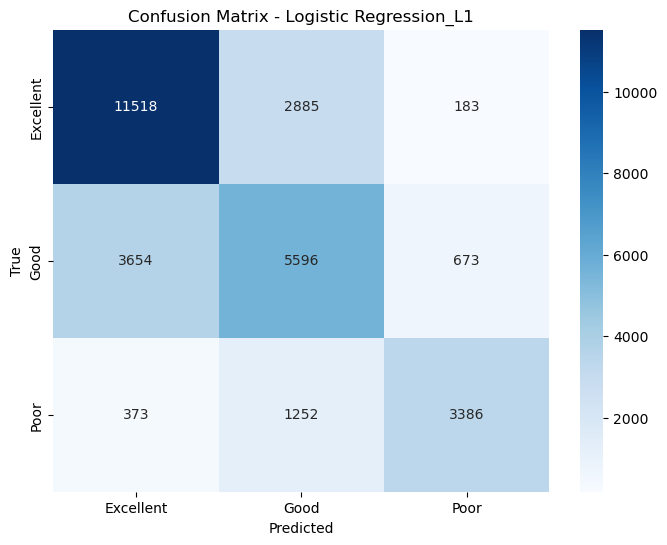

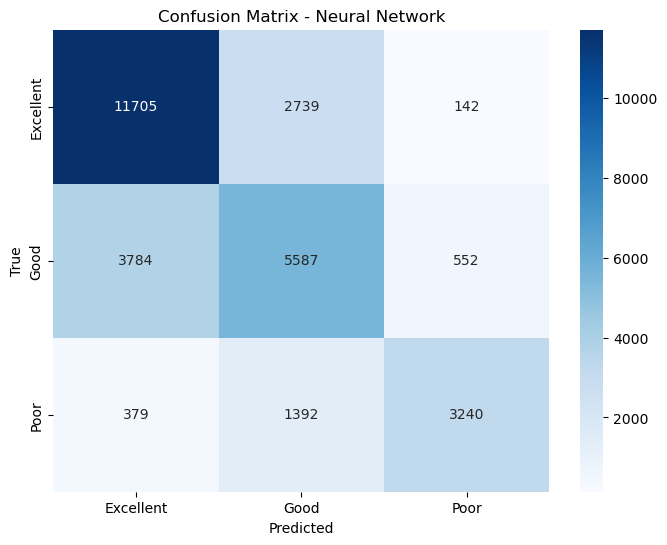

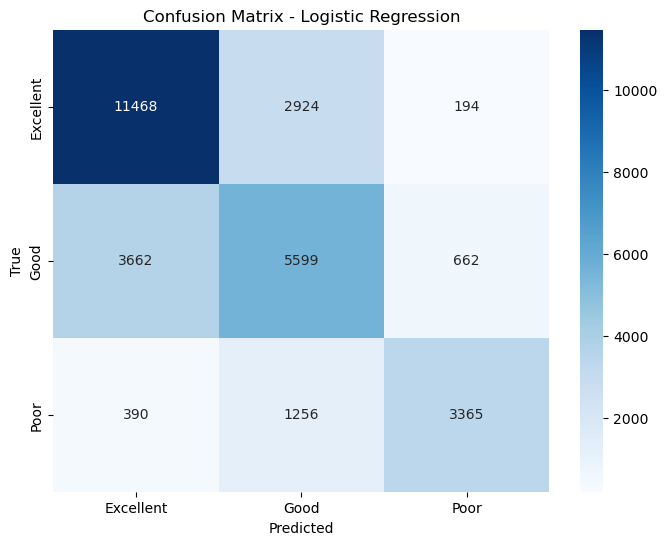

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Excellent', 'Good', 'Poor'], yticklabels=['Excellent', 'Good', 'Poor'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

lr_l1_test_predictions = classifier_l1.predict(X_test_tfidf)
nn_test_predictions = classifier.predict(X_test_tfidf)
lr_test_predictions = classifier_lr.predict(X_test_tfidf)  

plot_confusion_matrix('Logistic Regression_L1', y_test, lr_l1_test_predictions)
plot_confusion_matrix('Neural Network', y_test, nn_test_predictions)
plot_confusion_matrix('Logistic Regression', y_test, lr_test_predictions)
